In [13]:
"""

Plot significance of relationship between cloudiness and temperature with elevation.

"""

# Import modules
import numpy as np
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt

# Define path
path = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/data/'

# Define path to save
savepath = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/'

# Define slopes and intercepts
ds1 = xr.open_dataset(path + '/empirical_cloud_model.nc')

# Define ice sheet mask and elevations
ismip_1km = xr.open_dataset(path + 'masks/1km-ISMIP6.nc')

# Define maximum snowline
snowline_file = netCDF4.Dataset(path + 'sci-adv-products/Monthly_Bare_Ice_2012.nc')
snowline = snowline_file.variables['bare_ice'][1, :, :].filled(np.nan)
max_snowline = (snowline > 0.1)

In [3]:
# Define 2.5 K bins
bins = np.arange(260, 285, 2.5)

mean_p = []
mean_temp = []
area = []
for i in range(len(bins) - 1):
    
    # Define mask
    temp_mask = (ds1['mean_temp'] > bins[i]) & (ds1['mean_temp'] < bins[i+1]).values
    temp_mask = np.array(temp_mask)[ismip_1km['ICE'] == 1]
    
    # Get values
    mean_p.append(np.nanmedian(np.array(ds1['p_value'])[ismip_1km['ICE'] == 1][temp_mask]))
    mean_temp.append(np.nanmedian(np.array(ds1['mean_temp'])[ismip_1km['ICE'] == 1][temp_mask]))
    area.append(np.sum(temp_mask))

In [4]:
# Remove NaNs
mask = np.isfinite(ds1['p_value'])

# Flatten
flat_p = np.array(ds1['p_value'])[mask]
flat_temp = np.array(ds1['mean_temp'])[mask]

# Remove spurious temp values
temp_mask = flat_temp < 285

# Mask again
flat_p = flat_p[temp_mask]
flat_temp = flat_temp[temp_mask]

In [31]:
# Find mean temperature of ablation zone
np.nanpercentile(ds1['mean_temp'].values[max_snowline], 25)

270.489990234375

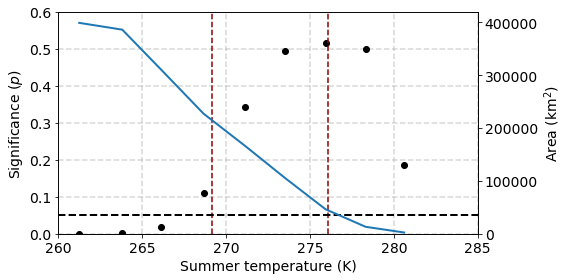

In [30]:
# Plot all
fig, (ax1) = plt.subplots(figsize=(8, 4))
ax1.scatter(mean_temp, mean_p, c='k', zorder=2)
ax1.set_ylim(0, 0.6)
ax1.set_ylabel('Significance ($p$)', fontsize=14)
ax1.set_xlabel('Summer temperature (K)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.grid(ls='dashed', lw=1.5, alpha=0.5, zorder=1)
ax1.set_xlim(260, 285)
ax1.axvline(np.nanpercentile(ds1['mean_temp'].values[max_snowline], 10), ls='dashed', color='darkred')
ax1.axvline(np.nanpercentile(ds1['mean_temp'].values[max_snowline], 90), ls='dashed', color='darkred')

ax2 = ax1.twinx()
ax2.plot(mean_temp, area, lw=2, zorder=2)
ax2.set_ylim(0, 420000)
ax2.set_ylabel('Area (km$^2$)', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax1.axhline(0.05, ls='dashed', lw=2, color='k')
fig.tight_layout()

plt.savefig(savepath + 'revised-manuscript/supp_figures/fig_sx.pdf', facecolor='w', transparent=False)